In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var
import numpy as np

In [11]:
df = pd.read_csv("SBI_Life_insurance.csv")

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [13]:
df.shape

(1338, 8)

In [14]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [15]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

# Exploratory data analysis

In [16]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


### check and remove skewness from dataset by using feature transformation

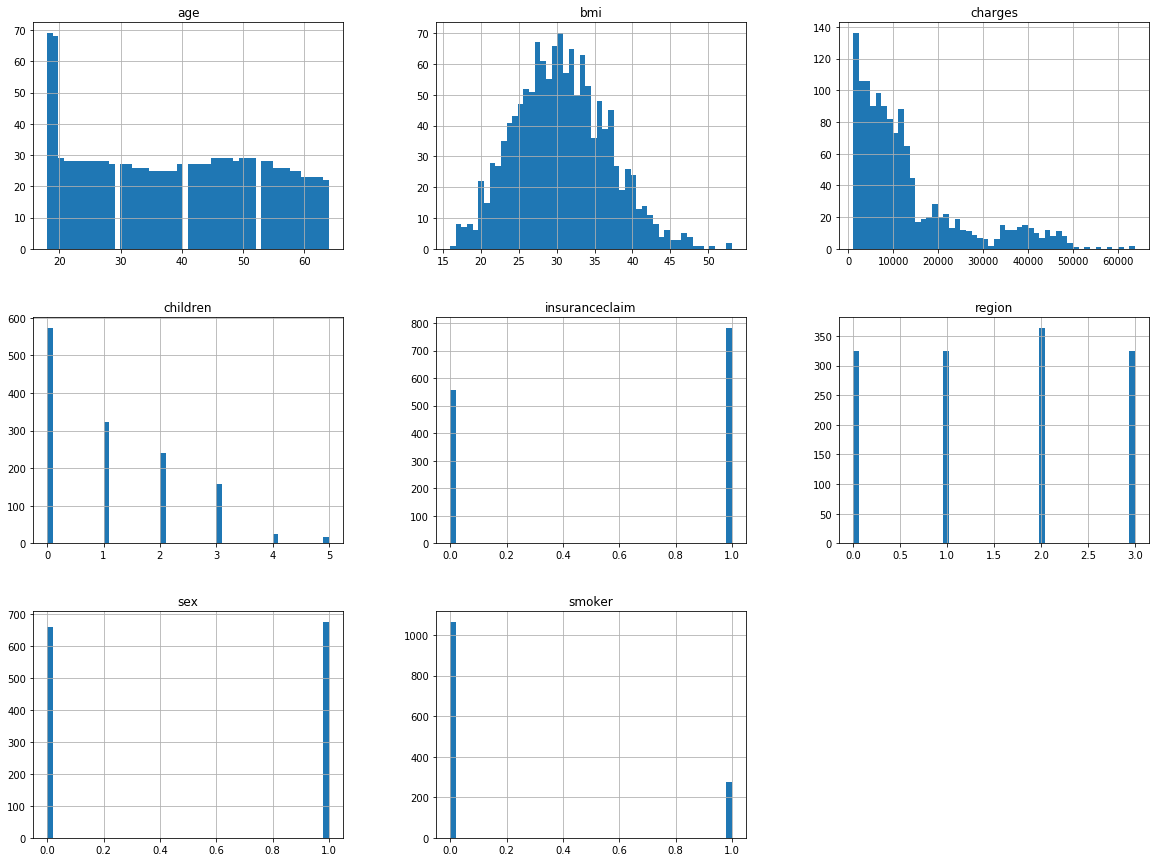

In [17]:
df.dropna().hist(bins=50,figsize=(20,15))
plt.show()

here,we can see that the 'charges' are suffering from skewness..

In [18]:
df.skew() 

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [19]:
print('Skewness: %f' % df['charges'].skew())
print('Kurtsis: %f' % df['charges'].kurt())

Skewness: 1.515880
Kurtsis: 1.606299


Text(0.5, 0, 'log-charges')

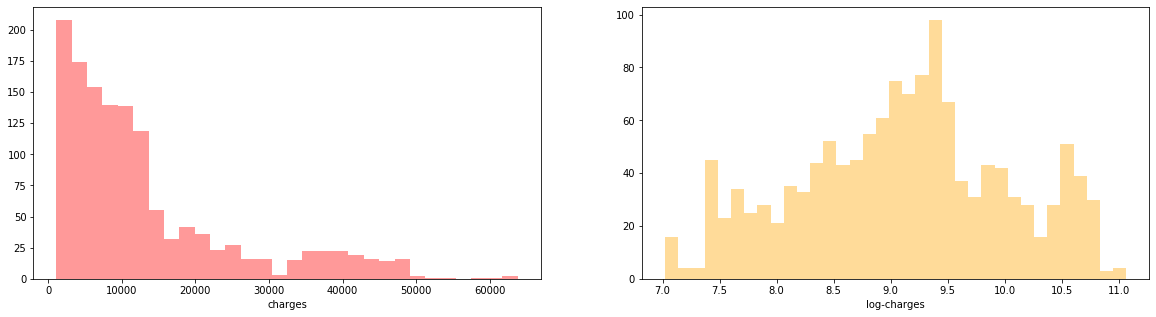

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.charges.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.log(df.charges.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("log-charges")

In [21]:
print('Skewness: %f' % np.cbrt(df.charges.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(df.charges.dropna()).kurt())

Skewness: 0.515183
Kurtsis: -0.421222


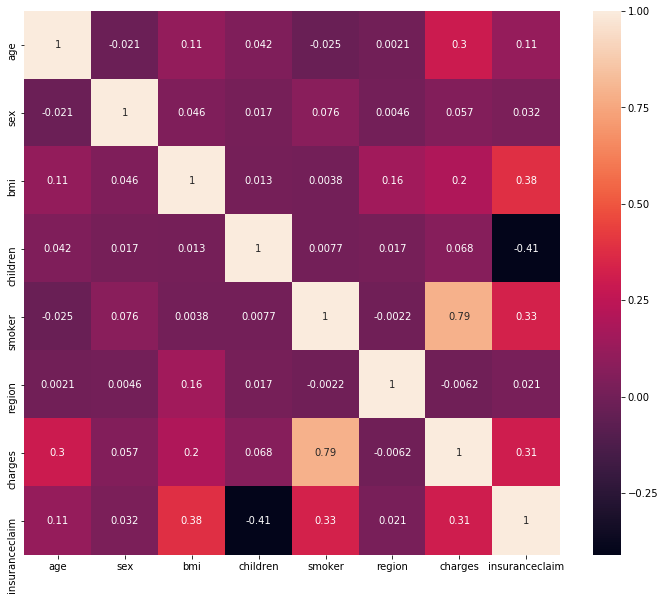

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [23]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


so we can see that the highest correlation between insuranceclaim and charges is 0.309 and also correlation between charges and smokers is very strong i.e:0.787.

In [24]:
print("Summary Statistics of Medical Costs")
print(df['charges'].describe())
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))
print("missing charges values: {}".format(df['charges'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
skew:  1.5141797118745743
kurtosis:  1.595821363956751
missing charges values: 0
missing smoker values: 0


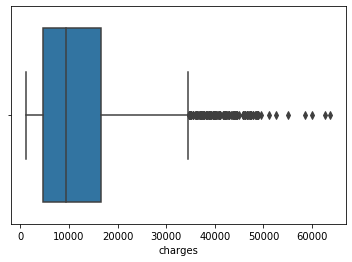

In [25]:
sns.boxplot(df['charges'])

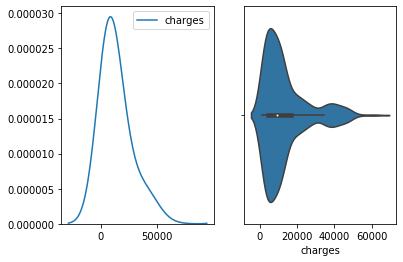

In [26]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['charges'], bw=10000, ax=axes[0])
sns.violinplot(df['charges'], ax=axes[1])
plt.show()

Both the boxplot and kernel density estimation plot reveal that the charges data is right skewed. Furthermore, there are some outliers but no missing charges and smoker values.

In [27]:
print ("Gender counts, 0=female, 1=male")
female = int (df.sex.value_counts()[0])
print (df.sex.value_counts())
print ("Prob Male: %.3f,\tProb Female: %.3f" % (1-(female/1338), (female/1338)))

Gender counts, 0=female, 1=male
1    676
0    662
Name: sex, dtype: int64
Prob Male: 0.505,	Prob Female: 0.495


# Objective Part 1: Do smokers have statistically higher mean individual medical costs billed by health insurance than do non-smokers?

In [28]:
print ("\n\nSmoker stats, 0=non-smoker, 1=smoker")
non_smoker = df.smoker.value_counts()[0]
print (df.smoker.value_counts())
print ("Prob Non-smoker: %.3f,\tProb smoker: %.3f" % ((non_smoker/1338), 1-(non_smoker/1338)))



Smoker stats, 0=non-smoker, 1=smoker
0    1064
1     274
Name: smoker, dtype: int64
Prob Non-smoker: 0.795,	Prob smoker: 0.205


In [29]:
print ("\n\nAge stats")
underage = df.age.between(0,17.999, inclusive=True).value_counts().get(True, 0)
adult = df.age.between(18, 39.999, inclusive=True).value_counts().get(True, 0)
overadult = df.age.between(40, 59.999, inclusive=True).value_counts().get(True, 0)
old = df.age.between(60, 200, inclusive=True).value_counts().get(True, 0)
print ("0-18: \t%d,\t%.3f" % (underage, underage/1338))
print ("18-40: \t%d,\t%.3f" % (adult, adult/1338))
print ("40-60: \t%d,\t%.3f" % (overadult, overadult/1338))
print ("60-: \t%d,\t%.3f" % (old, old/1338))



Age stats
0-18: 	0,	0.000
18-40: 	674,	0.504
40-60: 	550,	0.411
60-: 	114,	0.085


In [30]:
#prepare our 2 groups to test
smoker = df[df['smoker']==1]
non_smoker = df[df['smoker']==0]

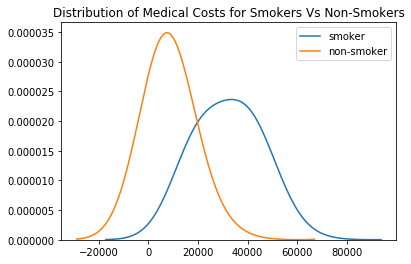

In [31]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker['charges'], bw=10000, label='smoker')
ax = sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker')
plt.show()

# Objective Part 2: Is a person's BMI correlated with individual medical costs billed by health insurance?

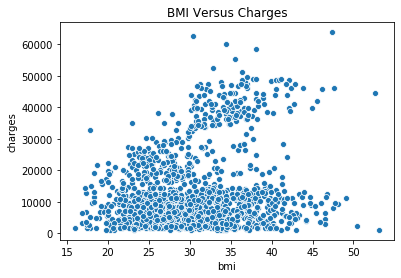

In [32]:
plt.title("BMI Versus Charges")
ax = sns.scatterplot(x="bmi", y="charges", data=df)
plt.show()

In [33]:
df.bmi.corr(df.charges)

0.1983409688336289

The scatterplot and correlation coefficient both reveal that bmi and charges have a very weak correlation. However, for charges larger than a specified amount, there might be a stronger correlation.

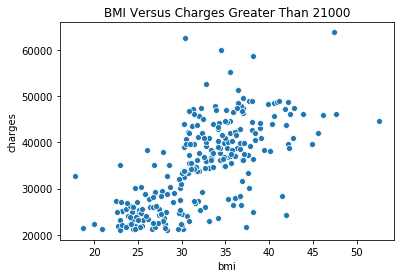

In [34]:
df_new = df[df['charges']>=21000]
plt.title("BMI Versus Charges Greater Than 21000")
ax = sns.scatterplot(x="bmi", y="charges", data=df_new)
plt.show()

In [35]:
df_new.bmi.corr(df.charges)

0.6724519995614608

After examining the convergence of correlation coefficients, I looked at charges larger than 21,000 USD. The scatterplot and correlation coefficient reveal a "moderate" positive relationship between bmi and charges larger than 21,000 USD.

In [36]:
df_new.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
3,33,1,22.705,0,0,1,21984.47061,0
9,60,0,25.840,0,0,1,28923.13692,0
11,62,0,26.290,0,1,2,27808.72510,1
14,27,1,42.130,0,1,2,39611.75770,1
19,30,1,35.300,0,1,3,36837.46700,1


In [37]:
df_new['charges'] = np.log(df_new.charges)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Data preparation

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df_new.drop('insuranceclaim',axis=1))
scale_features = scalar.transform(df_new.drop('insuranceclaim',axis = 1))

df_feat = pd.DataFrame(scale_features,columns = df_new.columns[:-1])
df_feat.head()

,age,sex,bmi,children,smoker,region,charges
0,-0.691276,0.858188,-1.654687,-1.024068,-1.961901,-0.472322,-1.557360
1,1.240567,-1.165246,-1.110237,-1.024068,-1.961901,-0.472322,-0.549061
2,1.383666,-1.165246,-1.032086,-1.024068,0.509710,0.468660,-0.693491
3,-1.120575,0.858188,1.718819,-1.024068,0.509710,0.468660,0.606928
4,-0.905925,0.858188,0.532665,-1.024068,0.509710,1.409642,0.340025


In [39]:
X = df_feat
y = df_new['insuranceclaim']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.25)


# Model building

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = RandomForestClassifier()
model=clf.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, test_pred)

0.9230769230769231

In [70]:
print("Accuracy score: {}".format(accuracy_score(y_test, test_pred)))

print(classification_report(y_test, test_pred))

Accuracy score: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.92      1.00      0.96        55

    accuracy                           0.92        65
   macro avg       0.96      0.75      0.81        65
weighted avg       0.93      0.92      0.91        65



### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [71]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
   
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)

 The best score across ALL searched params:
 0.9485714285714286

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.2}

 The train_accuracy across ALL models:
 0.9375

 The test_accuracy across ALL models:
 0.8769230769230769

 The train_confusion matrix across ALL models:
 [[ 16  10]
 [

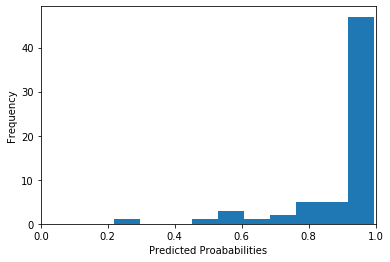

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.9534820824881678

 The best parameters across ALL searched params:
 {'learning_rate': 0

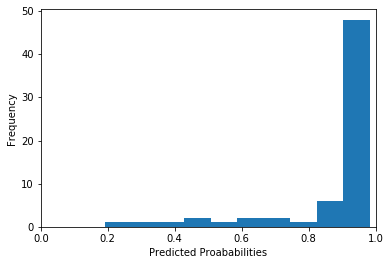

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9565436579955636

 The best parameters across ALL searched params:
 {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 4}

 The train_accuracy across ALL models:
 0.9895833333333334

 The test_accuracy across ALL models:
 0.907692

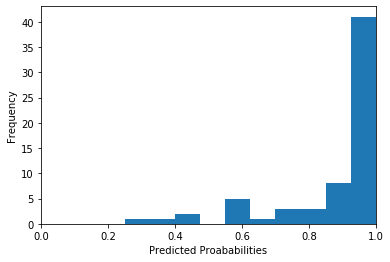

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 The best score across ALL searched params:
 0.9612176516717759

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'rbf'}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL models:
 0.9384615384615385

 The train_confusion matrix across ALL models:
 [[ 26   0]
 [  0 166]]

 The test_confusion matrix across ALL models:
 [[ 7  3]
 [ 1 54]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.95      0.98      0.96   

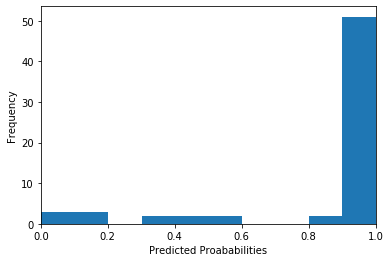

None



In [72]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

we can see that the 'RandomForestClassifier' model has best score and their actual and predicted accuracy are nearby same as campare to other models

### bar plot of features importances

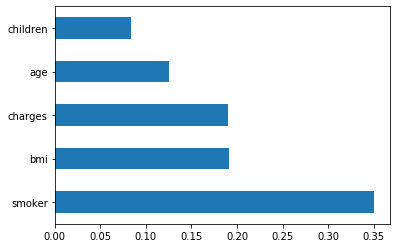

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

##### from this graph we can see that the most important feature for this model is 'smoker'.

## save model

In [42]:
import pickle

In [43]:
filename='SBI_Life_insurance_RandomForestClassifier_model.sav'

In [44]:
pickle.dump(model, open(filename, 'wb'))

In [45]:
load_lr_model =pickle.load(open(filename, 'rb'))